In [2]:
import pandas as pd
import numpy as np
import pickle
from matplotlib import pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
import data_cleaning_functions as dcf

from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, auc, roc_curve, plot_roc_curve


# Importing the data

In [3]:
infile = open("data/df", "rb")
df = pickle.load(infile)
infile.close()
df

,id,created_at,tweet,keyword,target,clean_tweet
0,1396047477695029249,2021-05-22 10:17:10+00:00,Tava tão feliz c o apartamento mas acho q é golpe,feliz,positive,tav tao apart ach golp
1,1396047411047542785,2021-05-22 10:16:54+00:00,@rita_castro1 Bom dia Sweetie!! Sábado feliz!!...,feliz,positive,bom dia sweti ! sab ! ☕
2,1396047195921604611,2021-05-22 10:16:03+00:00,Bom dia e um feliz sábado a todos ✌🏼💜🍀. 😘😘 htt...,feliz,positive,bom dia sab tod ✌
3,1396046918153904128,2021-05-22 10:14:57+00:00,Eu estou tão feliz pela Hande ela merece tudo !,feliz,positive,tao hand merec tud !
4,1396045926016368642,2021-05-22 10:11:00+00:00,Estou tao feliz finalmente em Castelo Branco c...,feliz,positive,tao final castel branc xuxu
...,...,...,...,...,...,...
23327,1397872771640827908,2021-05-27 11:10:14+00:00,Eu: detesto musicais 🤮🤮🤮🤮\n\nAlso eu a dois mi...,detesto OR detestei,negative,music als doi minut episodi music anatom grey ...
23328,1397867369276579840,2021-05-27 10:48:46+00:00,Detesto está situação poha,detesto OR detestei,negative,situ poh
23329,1397839222883688449,2021-05-27 08:56:55+00:00,Que linda noite de sono ao sonhar com a pessoa...,detesto OR detestei,negative,lind noit son sonh pesso conhec faculdad ent ta
23330,1397833381099061248,2021-05-27 08:33:43+00:00,@Joaohpr Também detesto e evito sempre que exi...,detesto OR detestei,negative,evit sempr exist altern fac tap ryana ra tem…


In [4]:
infile = open("data/vectorizer", "rb")
vectorizer = pickle.load(infile)
infile.close()
vectorizer

CountVectorizer()

In [5]:
vocabulary = vectorizer.get_feature_names()
vocabulary[0:10]

['ab',
 'abac',
 'abacat',
 'abacax',
 'abaf',
 'abaix',
 'abal',
 'aban',
 'abandon',
 'abat']

In [6]:
infile = open("data/doc_term_matrix", "rb")
doc_term_matrix = pickle.load(infile)
infile.close()
doc_term_matrix

<22842x12569 sparse matrix of type '<class 'numpy.int64'>'
	with 150810 stored elements in Compressed Sparse Row format>

In [7]:
infile = open("data/pivoted_dcm", "rb")
pivoted_dtm = pickle.load(infile)
infile.close()
pivoted_dtm

target_value,0,1
ab,2,3
abac,0,1
abacat,1,2
abacax,0,1
abaf,2,1
...,...,...
ℂℙ,0,1
ℕℂℕ,0,1
ℙℝ,0,1
스트레이키즈,0,1


# Trying out multinomial Naive Bayes model (with stratified k-fold cross-validation)

In [8]:
X = doc_term_matrix
y = np.where(df["target"]=="positive", 1, 0)

k=10
skf = StratifiedKFold(n_splits=k, random_state=None)
model_multinomialNB = MultinomialNB()
 
acc_score = []
 
for train_index , test_index in skf.split(X, y):
    X_train, X_test = X[train_index,:], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
     
    model_multinomialNB.fit(X_train, y_train)
    pred_values = model_multinomialNB.predict(X_test)
     
    acc = accuracy_score(pred_values, y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))


accuracy of each fold - [0.687964989059081, 0.7129102844638949, 0.7408056042031523, 0.7285464098073555, 0.7530647985989493, 0.7005253940455342, 0.7014010507880911, 0.7574430823117339, 0.6795096322241682, 0.7049036777583187]
Avg accuracy : 0.7167074923260279


# Trying out Bernoulli Naive Bayes model (with stratified k-fold cross-validation)

In [9]:
X = doc_term_matrix
y = np.where(df["target"]=="positive", 1, 0)

k=10
skf = StratifiedKFold(n_splits=k, random_state=None)
model_bernoulliNB = BernoulliNB(binarize = 0.1)
 
acc_score = []
 
for train_index , test_index in skf.split(X, y):
    X_train , X_test = X[train_index,:],X[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    model_bernoulliNB.fit(X_train,y_train)
    pred_values = model_bernoulliNB.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))


accuracy of each fold - [0.6787746170678337, 0.6932166301969366, 0.7259194395796847, 0.707968476357268, 0.7478108581436077, 0.6970227670753065, 0.6786339754816112, 0.7294220665499125, 0.6357267950963222, 0.6847635726795096]
Avg accuracy : 0.6979259198227993


# Trying out logistic regression (with stratified k-fold cross-validation)

In [10]:
X = doc_term_matrix
y = np.where(df["target"]=="positive", 1, 0)

k=10
skf = StratifiedKFold(n_splits=k, random_state=None)
model_logistic = LogisticRegression(max_iter=500)
 
acc_score = []
 
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index,:], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
     
    model_logistic.fit(X_train, y_train)
    pred_values = model_logistic.predict(X_test)
     
    acc = accuracy_score(pred_values, y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.687527352297593, 0.7107221006564551, 0.7320490367775832, 0.7552539404553416, 0.7556917688266199, 0.7114711033274956, 0.7167250437828371, 0.7609457092819615, 0.7057793345008757, 0.7084063047285464]
Avg accuracy : 0.7244571694635309


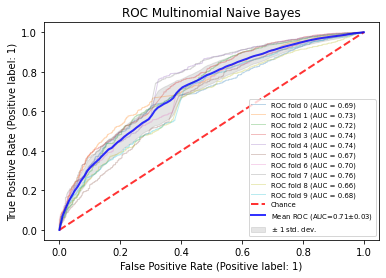

In [11]:
cv = StratifiedKFold(n_splits=10)
classifier = MultinomialNB()

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = plot_roc_curve(classifier, X[test], y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC=%0.2f$\pm$%0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="ROC Multinomial Naive Bayes")
ax.legend(loc="lower right", fontsize = 'x-small')
plt.show()

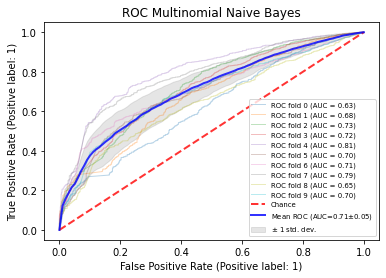

In [12]:
cv = StratifiedKFold(n_splits=10)
classifier = BernoulliNB()

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = plot_roc_curve(classifier, X[test], y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC=%0.2f$\pm$%0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="ROC Multinomial Naive Bayes")
ax.legend(loc="lower right", fontsize = 'x-small')
plt.show()

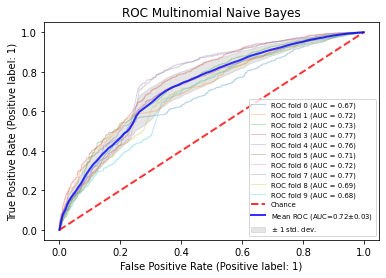

In [13]:
cv = StratifiedKFold(n_splits=10)
classifier = LogisticRegression(max_iter=500)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = plot_roc_curve(classifier, X[test], y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC=%0.2f$\pm$%0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="ROC Multinomial Naive Bayes")
ax.legend(loc="lower right", fontsize = 'x-small')
plt.show()

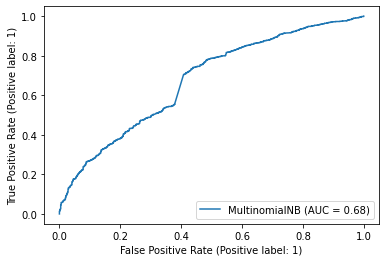

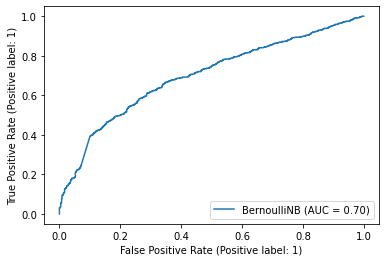

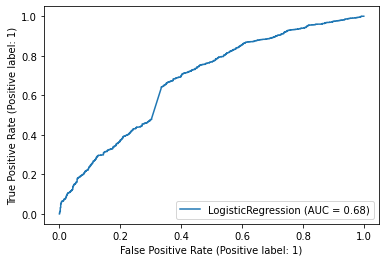

In [14]:
viz_multinomialNB = plot_roc_curve(model_multinomialNB, X_test, y_test)
viz_bernoulliNB = plot_roc_curve(model_bernoulliNB, X_test, y_test)
viz_logistic = plot_roc_curve(model_logistic, X_test, y_test)

[Text(0.5, 1.0, 'ROC')]

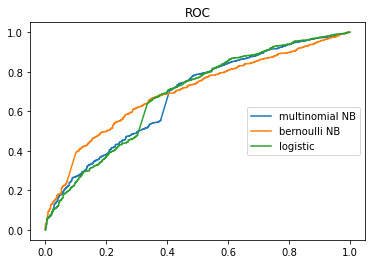

In [15]:
ax = plt.axes()
ax.plot(viz_multinomialNB.fpr, viz_multinomialNB.tpr, label = "multinomial NB")
ax.plot(viz_bernoulliNB.fpr, viz_bernoulliNB.tpr, label = "bernoulli NB")
ax.plot(viz_logistic.fpr, viz_logistic.tpr, label = "logistic")
ax.legend(loc = "right")
ax.set(title="ROC")

In [16]:
y_test

array([1, 1, 1, ..., 0, 0, 0])

In [17]:
test_example = "Adoro o último livro da saga do senhor dos anéis. Melhor livro do ano!"
test_example_2 = "Odiei o último livro da saga do senhor dos anéis. Pior livro do ano!"
test_example_3 = "Este filme foi tão aborrecified"

In [18]:
model = model_multinomialNB

In [19]:
def predict_polarity(text, vocabulary, fitted_model):
    text = " ".join([i for i in dcf.clean_up_tweets(text).split() if i in vocabulary])
    
    vectorizer = CountVectorizer()
    
    tokenized_text = pd.DataFrame(vectorizer.fit_transform([text]).toarray(), columns=vectorizer.get_feature_names())
    print(tokenized_text)
    
    prediction = fitted_model.predict([[1 if i in text else 0 for i in vocabulary]])[0]
    
    if prediction == 0:
        print("Model predicts negative sentiment")
    else:
        print("Model predicts positive sentiment")
        
    print(f"Probability of negative sentiment: {fitted_model.predict_proba([[1 if i in text else 0 for i in vocabulary]])[0][0]}")
    print(f"Probability of positive sentiment: {fitted_model.predict_proba([[1 if i in text else 0 for i in vocabulary]])[0][1]}")
    
predict_polarity(test_example, vocabulary, model)
predict_polarity(test_example_2, vocabulary, model)
predict_polarity(test_example_3, vocabulary, model)

   ador  anel  ano  do  livr  melhor  sag  senh  ult
0     1     1    1   3     2       1    1     1    1
Model predicts negative sentiment
Probability of negative sentiment: 0.7982700297273805
Probability of positive sentiment: 0.2017299702726323
   anel  ano  do  livr  odi  pi  sag  senh  ult
0     1    1   3     2    1   1    1     1    1
Model predicts negative sentiment
Probability of negative sentiment: 0.8102862317491727
Probability of positive sentiment: 0.1897137682508299
   est  film  tao
0    1     1    1
Model predicts negative sentiment
Probability of negative sentiment: 0.8724787852344837
Probability of positive sentiment: 0.12752121476552034


Things to try:
- stemming vs no stemming
- removing words that are too long to be true - DONE
- removing very short tweets
- removing duplicate tweets (from different keywords)


- gaussian and bernoulli - DONE 
    - bernoulli - performed slightly worse 
    - gaussian - performed slightly worse
    - logistic regression - performed marginally better, but takes considerably longer (still viable, a few minutes)
    - decision tree - performed slightly worse and took >15min
- other models?
- playing around with parameters/hyperparameter tuning
- test several times with different train/test splits (cross validation) - DONE
- think about balancing the training set? Try this once i have 10000 each, positive and negative
- get reviews from some website with associated ratings, evaluate if the predicted sentiment correlates with ratings
- check stopwords. Definitely remove nao
- think about adding a third category to the predictor (neutral/mixed/unclear) based on the probabilities; if close to 0.5, this category would probably be better than positive/negative
- implement the naive bayes model from scratch, to allow for the probabilities of each word to be visible (and maybe play around with a possible implementation of negation)

In [20]:
total_positive = df["target"].value_counts()["positive"]
total_negative = df["target"].value_counts()["negative"]
total_tweets = df["target"].value_counts().sum()

p_positive = total_positive / total_tweets
p_negative = total_negative / total_tweets

print(f"Number of positive tweets = {total_positive}")
print(f"Number of negative tweets = {total_negative}")
print(f"Total number of tweets = {total_tweets}")

print(f"p_positive = {p_positive}")
print(f"p_negative = {p_negative}")

Number of positive tweets = 15786
Number of negative tweets = 7056
Total number of tweets = 22842
p_positive = 0.6910953506698188
p_negative = 0.30890464933018125


In [21]:
pivoted_dtm.loc["abaix", 1]

7

In [22]:
pivoted_dtm.loc["abaix", 0]

14

In [23]:
#adding alpha=1 to all counts

pivoted_dtm[1] = pivoted_dtm[1] + 1
pivoted_dtm[0] = pivoted_dtm[0] + 1

pivoted_dtm

target_value,0,1
ab,3,4
abac,1,2
abacat,2,3
abacax,1,2
abaf,3,2
...,...,...
ℂℙ,1,2
ℕℂℕ,1,2
ℙℝ,1,2
스트레이키즈,1,2


In [25]:
pivoted_dtm["p_word_given_positive"] = pivoted_dtm[1] / total_positive

In [26]:
pivoted_dtm["p_word_given_negative"] = pivoted_dtm[0] / total_negative

In [27]:
pivoted_dtm

target_value,0,1,p_word_given_positive,p_word_given_negative
ab,3,4,0.000253,0.000425
abac,1,2,0.000127,0.000142
abacat,2,3,0.000190,0.000283
abacax,1,2,0.000127,0.000142
abaf,3,2,0.000127,0.000425
...,...,...,...,...
ℂℙ,1,2,0.000127,0.000142
ℕℂℕ,1,2,0.000127,0.000142
ℙℝ,1,2,0.000127,0.000142
스트레이키즈,1,2,0.000127,0.000142


In [28]:
# IMPROVE THIS - right now it takes the whole dataset as a training set. Implement stratified k-fold cross validation. Return/print not just the output class, but also 
# the words with their respective probabilities

# This function requires the input text to already be cleaned up in the same way as when I created the training dataset.
# Therefore I also need to create a .py file with the functions I used for data cleaning, so that I can import them here

def multinomial_nb_from_scratch(clean_text):    
    clean_text = [i for i in clean_text.split() if i in pivoted_dtm.index]
    
    prob_positive = p_positive
    for word in clean_text:
        prob_positive = prob_positive * pivoted_dtm.loc[word, "p_word_given_positive"]
        print(word, pivoted_dtm.loc[word, "p_word_given_positive"])
    print(prob_positive)
    
    prob_negative = p_negative
    for word in clean_text:
        prob_negative = prob_negative * pivoted_dtm.loc[word, "p_word_given_negative"]
        print(word, pivoted_dtm.loc[word, "p_word_given_negative"])
    print(prob_negative)
    
    print(prob_positive/(prob_positive + prob_negative))
    print(prob_negative/(prob_positive + prob_negative))

multinomial_nb_from_scratch("Esta semana vai tar bue cocó")

semana 0.00012669453946534905
vai 0.0266058532877233
tar 0.0015836817433168631
bue 0.00924870138097048
3.412099820555234e-11
semana 0.0001417233560090703
vai 0.037273242630385485
tar 0.002551020408163265
bue 0.011479591836734694
4.778630260275164e-11
0.41658066947425354
0.5834193305257463
